In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_table('VDJDB_full_ab.txt')
print(raw_data.shape)
n_samples = raw_data.shape[0]
raw_data.head()

(22143, 38)


,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,cdr3fix.alpha,cdr3fix.beta,vdjdb.score,genP_1mism_alpha,genP_0mism_alpha,genP_1mism_beta,genP_0mism_beta
0,NaN,NaN,NaN,CASSSGQLTNTEAFF,TRBV9*01,NaN,TRBJ1-1*01,HomoSapiens,HLA-A*02:01,B2M,...,HLA-A*02:01,NaN,NaN,NaN,"{""cdr3"": ""CASSSGQLTNTEAFF"", ""cdr3_old"": ""CASSS...",1,NaN,NaN,2.070000e-07,2.333333e-09
1,NaN,NaN,NaN,CASSASARPEQFF,TRBV9*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,...,HLA-A*02:01,NaN,NaN,NaN,"{""cdr3"": ""CASSASARPEQFF"", ""cdr3_old"": ""CASSASA...",0,NaN,NaN,1.500000e-08,0.000000e+00
2,NaN,NaN,NaN,CASSSGLLTADEQFF,TRBV9*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,...,HLA-A*02:01,NaN,NaN,NaN,"{""cdr3"": ""CASSSGLLTADEQFF"", ""cdr3_old"": ""CASSS...",0,NaN,NaN,2.000000e-09,0.000000e+00
3,NaN,NaN,NaN,CASSSGQVSNTGELFF,TRBV9*01,NaN,TRBJ2-2*01,HomoSapiens,HLA-A*02:01,B2M,...,HLA-A*02:01,NaN,NaN,NaN,"{""cdr3"": ""CASSSGQVSNTGELFF"", ""cdr3_old"": ""CASS...",0,NaN,NaN,1.180000e-07,1.666667e-09
4,NaN,NaN,NaN,CSARDRTGNGYTF,TRBV20-1*01,NaN,TRBJ1-2*01,HomoSapiens,HLA-A*02:01,B2M,...,HLA-A*02:01,NaN,NaN,NaN,"{""cdr3"": ""CSARDRTGNGYTF"", ""cdr3_old"": ""CSARDRT...",2,NaN,NaN,1.660000e-07,4.333333e-09


In [4]:
x = pd.notnull(raw_data.iloc[:, 0])
y = pd.notnull(raw_data.iloc[:, 3])
valid = [x[i] and y[i] for i in range(n_samples)]
print(sum(valid))
data_pd = raw_data.iloc[valid, [0, 3, 34, 35, 36, 37]].drop_duplicates()
n_samples = data_pd.shape[0]
print(data_pd.shape)
data_pd.head()

1560
(1362, 6)


,cdr3.alpha,cdr3.beta,genP_1mism_alpha,genP_0mism_alpha,genP_1mism_beta,genP_0mism_beta
78,CAGNNARPMF,CASSQSPGGVAFF,1.450533e-05,0.000000,6.700000e-08,1.000000e-09
79,CAGNNARLMF,CASSQSPGGVAFF,1.621160e-04,0.000015,6.700000e-08,1.000000e-09
80,CAGNNARLVF,CASSQSPGGTQYF,1.450600e-05,0.000000,7.816667e-07,1.300000e-08
81,CAEGFASSDGQKLLF,CASSQSPGGTQYF,3.000000e-09,0.000000,7.816667e-07,1.300000e-08
82,CAGNNARLMF,CSARDRHREWLHF,1.621160e-04,0.000015,0.000000e+00,0.000000e+00


In [5]:
data = data_pd.as_matrix()
mini = np.min(data[data[:, 3] > 0, 2])
data[data[:, 2] == 0, 2] = mini
data[data[:, 4] == 0, 4] = mini
data[data[:, 3] == 0, 3] = mini
data[data[:, 5] == 0, 5] = mini

In [6]:
# d is pd Data Frame with two columns: sequence and p
def ProbDist(d):
    d1 = pd.DataFrame(d).drop_duplicates().as_matrix()
    d1[:, 1] = d1[:, 1] / np.sum(d1[:, 1])
    return d1

# p is sample probability distribution numpy array
def ShanonEntropy(p):
    return -np.sum(p * np.log(p))

# x is beta, the entropy parametr
def RenyiEntropy(p, x):
    p1 = np.array(p, dtype=np.float)
    if x == 1:
        return ShanonEntropy(p1)
    return np.log(np.sum(np.power(p1, x))) / (1 - x)

# D - Diversity is exponent of Renyi Entropy


# gen P 1

In [7]:
pa, pb = 2, 4
sa, sb = 0, 1

alpha_dist = ProbDist(data[:, [sa, pa]])
beta_dist = ProbDist(data[:, [sb, pb]])
pair_dist = np.array(data[:, pa] * data[:, pb], dtype=np.float)

random_dist = []
random_prob = []
for i in alpha_dist[:, 1]:
    for j in beta_dist[:, 1]:
        random_dist.append(i * j)
        random_prob.append([i, j])
random_dist = np.array(random_dist)
random_prob = np.array(random_prob)

xes = np.linspace(0.5, 3., 51)
y_alpha = np.array([RenyiEntropy(alpha_dist[:, 1], x) for x in xes], dtype=np.float)
y_beta = np.array([RenyiEntropy(beta_dist[:, 1], x) for x in xes], dtype=np.float)
y_pair = np.array([RenyiEntropy(pair_dist / np.sum(pair_dist), x) for x in xes], dtype=np.float)
y_random = np.array([RenyiEntropy(random_dist / np.sum(random_dist), x) for x in xes], dtype=np.float)

In [8]:
choice_dists = []
for i in range(100):
    choice = np.random.choice(random_dist, size=n_samples, p=random_dist)
    y_choice = np.array([RenyiEntropy(choice / np.sum(choice), x) for x in xes])
    choice_dists.append(y_choice)
choice_dist = np.random.choice(random_dist, size=n_samples, p=random_dist)
choice_prob_index = np.random.choice(random_prob.shape[0], size=n_samples, p=random_dist)
choice_prob = random_prob[choice_prob_index, :]


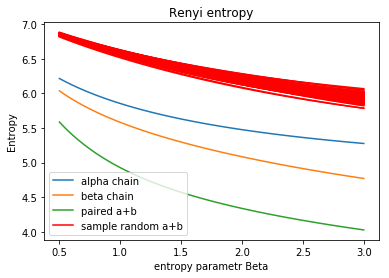

In [9]:
plt.plot(xes, y_alpha, label='alpha chain')
plt.plot(xes, y_beta, label='beta chain')
plt.plot(xes, y_pair, label='paired a+b')
# plt.plot(xes, y_random, label='full distribution a+b')
plt.plot(xes, choice_dists[0], label='sample random a+b', color='red')
for i in range(1, 100):
    plt.plot(xes, choice_dists[i], color='red')
plt.title('Renyi entropy')
plt.xlabel('entropy parametr Beta')
plt.ylabel('Entropy')
plt.legend()

Text(0.5,0,'alpha-beta pair probability')

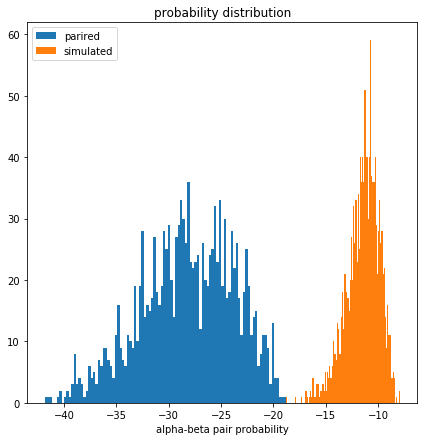

In [10]:
f, ax = plt.subplots(figsize=(7, 7))
n_bins = 100
n, bins, patches = plt.hist(np.log(pair_dist), bins=n_bins)
n, bins, patches = plt.hist(np.log(choice_dist), bins=n_bins)
plt.legend(['parired', 'simulated'])
plt.title('probability distribution')
plt.xlabel('alpha-beta pair probability')

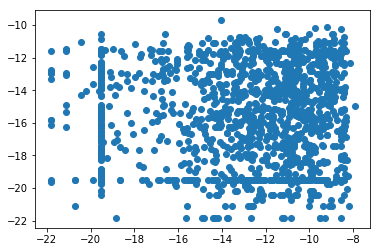

In [11]:
plt.scatter(np.log(np.array(data[:, pa], dtype=np.float)), 
            np.log(np.array(data[:, pb], dtype=np.float)))

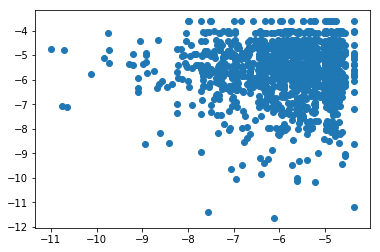

In [13]:
plt.scatter(np.log(np.array(choice_prob[:, 0], dtype=np.float)), 
            np.log(np.array(choice_prob[:, 1], dtype=np.float)))

On the picture above we see that when the probability of pair is the product of probabilities of alpha and beta chains, a bias to the right up cornar can be clearly seen. That means, that for real pairs, the probabilities of pairs are not so important.

In [22]:
s = set(data[:, 0])
l = {i:0 for i in s}
for i in data[:, 0]:
    l[i] += 1
x = np.zeros((len(s), 2), dtype=object)
s = list(s)
for i in range(len(s)):
    x[i, 0] = s[i]
    x[i, 1] = l[s[i]]
np.argmax(x[:, 1])

161

# gen p 0

In [273]:
pa, pb = 3, 5
sa, sb = 0, 1

alpha_dist = ProbDist(data[:, [sa, pa]])
beta_dist = ProbDist(data[:, [sb, pb]])
pair_dist = np.array(data[:, pa] * data[:, pb], dtype=np.float)

random_dist = []
for i in alpha_dist[:, 1]:
    for j in beta_dist[:, 1]:
        random_dist.append(i * j)
random_dist = np.array(random_dist)

xes = np.linspace(0.5, 3., 51)
y_alpha = np.array([RenyiEntropy(alpha_dist[:, 1], x) for x in xes], dtype=np.float)
y_beta = np.array([RenyiEntropy(beta_dist[:, 1], x) for x in xes], dtype=np.float)
y_pair = np.array([RenyiEntropy(pair_dist / np.sum(pair_dist), x) for x in xes], dtype=np.float)
y_random = np.array([RenyiEntropy(random_dist / np.sum(random_dist), x) for x in xes], dtype=np.float)

In [274]:
choice_dists = []
for i in range(100):
    choice_dist = np.random.choice(random_dist, size=n_samples, p=random_dist)
    y_choice = np.array([RenyiEntropy(choice_dist / np.sum(choice_dist), x) for x in xes])
    choice_dists.append(y_choice)
    
choice_dist = np.random.choice(random_dist, size=n_samples, p=random_dist)

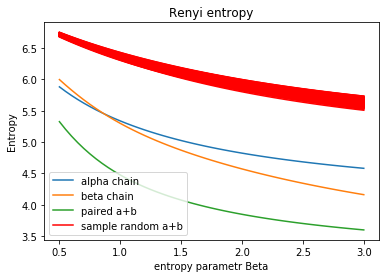

In [275]:
plt.plot(xes, y_alpha, label='alpha chain')
plt.plot(xes, y_beta, label='beta chain')
plt.plot(xes, y_pair, label='paired a+b')
# plt.plot(xes, y_random, label='full distribution a+b')
plt.plot(xes, choice_dists[0], label='sample random a+b', color='red')
for i in range(1, 100):
    plt.plot(xes, choice_dists[i], color='red')
plt.title('Renyi entropy')
plt.xlabel('entropy parametr Beta')
plt.ylabel('Entropy')
plt.legend()

Text(0.5,0,'alpha-beta pair probability')

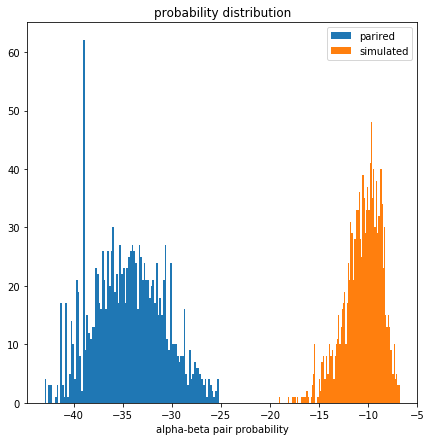

In [276]:
f, ax = plt.subplots(figsize=(7, 7))
n_bins = 100
n, bins, patches = plt.hist(np.log(pair_dist), bins=n_bins)
n, bins, patches = plt.hist(np.log(choice_dist), bins=n_bins)
plt.legend(['parired', 'simulated'])
plt.title('probability distribution')
plt.xlabel('alpha-beta pair probability')